# Module 1 Body Fat Data Analysis

<b>
<b>
<b>    

** By Yiqiao Zhang, Jia Liu, Jianxiong Wang, Xinjie Ye **

## Thesis Statement

<b>
To accurately estimate bodyfat with clinical measurements, we used several criterions to select important variables. After model diagonsis, we transformed independent variables to better satisfy linear model assumptions. 

We found out that among all 14 variables, the linear function of WEIGHT, WEIGHT transformation, ABDOMEN, FOREARM, and WRIST can best interpret bodyfat.

## Data Description

The data set consists of 17 variables with a sample space of 252 men. The 17 variables are INDO (index), Percentage of body fat (%), Body density from underwater weighing ($gm/cm^3$), Age ($year$), Weight ($lbs$), Height ($inches$), Adioposity (bmi) and ten Body Circumferences (Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist, all in units of cm). 

<b>
Percentage of body fat is given from Siri's (1956) equation:

<b>
    
    
$$BodyFat\ \% = \frac{495}{Density}\ –\ 450$$


## Data Cleaning


### General demographic information  

In [65]:
library("MASS")
library("car")
# library(plotly)
data = read.csv("Bodyfat.csv", header = TRUE)[,-1]
attach(data)
options(repr.plot.width=4, repr.plot.height=4, fig.align='center')

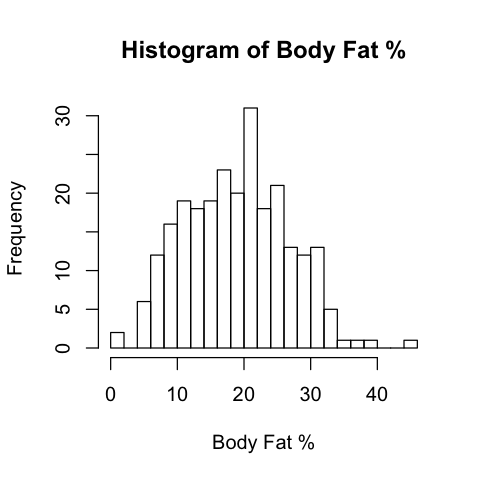

In [66]:
hist(BODYFAT, breaks = 30, main="Histogram of Body Fat %",xlab="Body Fat %")

We can see that there is one instance with 0% bodyfat, which is impossible;
also, the maximum value of bodyfat maybe abnormal.
Now, let's check these two points:

In [67]:
data[which(BODYFAT == 0), ]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


In [68]:
data[which(BODYFAT == max(data$BODYFAT)), ]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [69]:
bad <- NULL
bad <- which(BODYFAT == 0)

The No.216 record seems reasonable.

For No.182 record, we tried to predict its bodyfat with density by Siri's equation, but the prediction is negative, we conclude that the record of 182 is not valid. Thus we ruled it out from model.

### Outlier Detection

We fitted full linear model without No.182 record:

In [70]:
m1 <- lm(BODYFAT ~ ., data = data[-bad, -2])

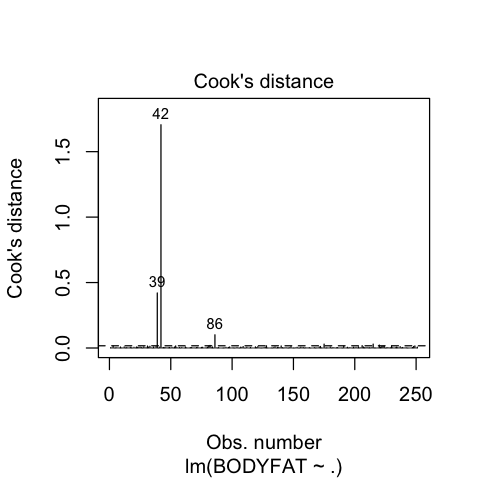

In [71]:
plot(m1, which = 4)
abline(h = 4/(nrow(data)-ncol(data)), lty = 2)

In [72]:
data[c(39, 42, 86),]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,1.0386,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2


In [73]:
bad <- c(bad,42)

** We conclude that the record of 42 may be not valid. **

### Consistence of DENSITY versus BODYFAT

In [74]:
reverse_de <- 1/DENSITY
# plot_ly(data, x = ~reverse_de, y = ~BODYFAT, type= "scatter", mode = "markers")
m0 <- lm(BODYFAT ~ reverse_de)
options(repr.plot.width=4, repr.plot.height=4, fig.align='center')

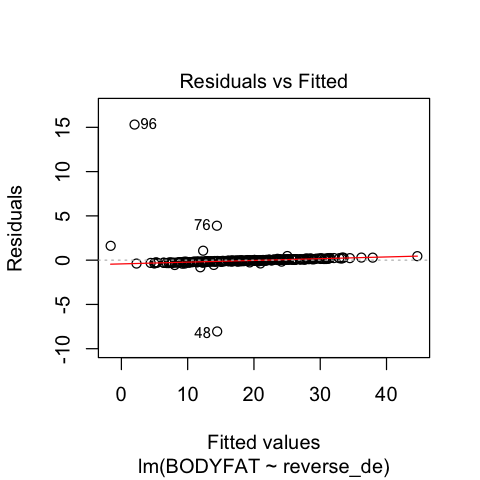

In [75]:
plot(m0, which = 1)

In [76]:
data[96,]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,17.3,1.0991,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


The calculated BODYFAT based on DENSITY is about 0.4

In [77]:
data[c(76, 24),]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
76,18.3,1.0666,61,148.25,67.5,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
24,17.6,1.0584,32,148.75,70.0,21.4,35.5,86.7,80.0,93.4,54.9,36.2,22.1,29.8,26.7,17.1


The calculated BODYFAT based on DENSITY is about 14.1

In [78]:
data[c(48, 24),]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
24,17.6,1.0584,32,148.75,70.00,21.4,35.5,86.7,80.0,93.4,54.9,36.2,22.1,29.8,26.7,17.1


In [79]:
data$BODYFAT[48] <- round(495/data$DENSITY[48]- 450, digits = 1)

The calculated BODYFAT based on DENSITY is about 14.1

We decided to use the BODYFAT value calculated with DENSITY.

### Consistence of BMI versus WEIGHT & HEIGHT

In [80]:
options(repr.plot.width=4, repr.plot.height=4, fig.align='center')
BMI <- (WEIGHT/2.2046226218)/((HEIGHT*0.0254)^2)

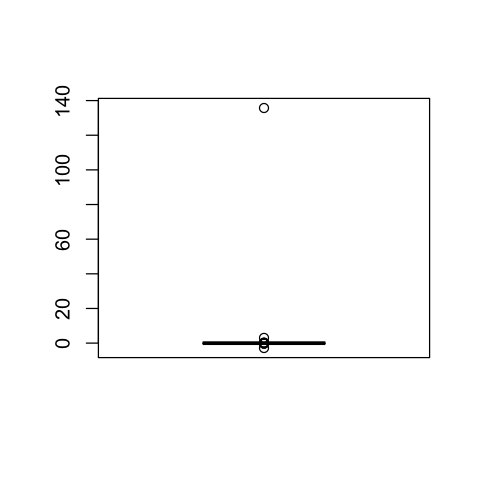

In [81]:
boxplot(BMI - ADIPOSITY)

The detected abnormal records are No.42, No.163, No.221

In [82]:
data[which(WEIGHT > 183 & WEIGHT < 185 & HEIGHT > 67 & HEIGHT < 69), ] 

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
19,16.1,1.0622,28,183.75,67.75,28.2,38.0,106.8,89.6,102.4,64.2,38.7,22.9,37.2,30.5,18.5
66,28.9,1.0313,55,183.50,67.50,28.3,40.9,103.0,100.3,104.2,64.8,40.2,22.7,34.8,30.1,18.7
163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7


In [83]:
data[which(WEIGHT > 153 & WEIGHT < 155 & HEIGHT > 69 & HEIGHT < 71), ]

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
218,8.2,1.0819,51,154.50,70.00,22.2,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6
220,15.1,1.0646,53,154.50,69.25,22.7,37.6,93.9,88.7,94.5,53.7,36.2,22.0,28.5,25.7,17.1
221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


** We conclude that the record of 163, 221 may be not valid. **

In [84]:
bad <- c(bad, 221, 163)
detach(data)
data <- data[-bad, -2]
attach(data)
m1 <- lm(BODYFAT ~ ., data)
m_null <- lm(BODYFAT ~ 1, data)

## Variable Selection

| Method               | Selected Varibles               |
| :--------------------| :-----------------------------: | 
| BIC Backward         | WEIGHT, ABDOMEN, FOREARM, WRIST |
| BIC  Forward  & Both | ABDOMEN, WEIGHT                 |
| AIC Backward         | 10 variables                    | 
| AICForward  & Both   | 6 variables                     | 
| Mallow's Cp          | 9 variables                     |
| LASSO                | 5 variables                     |
| rpart                | 5 variables                     |

In [85]:
### AIC
m_null <- lm(BODYFAT ~ 1, data)
m_AIC_back <- step(m1, k=2)
m_AIC_for <- step(m_null, direction="forward",
                       scope=list(lower=~1,upper=m1))
m_AIC_both <- step(m_null, direction="both",
                        scope=list(lower=~1, upper=m1))  # the selected models seem to complicated

m_BIC_back <- step(m1, k=log(nrow(data)-1)) # WEIGHT, ABDOMEN, FOREARM, WRIST
m_BIC_for <- step(m_null, direction="forward", 
                       scope=list(lower=~1,upper=m1), k=log(nrow(data)-1))  # WEIGHT, ABDOMEN
m_BIC_both <- step(m_null, direction="both",
                        scope=list(lower=~1,upper= m1), k=log(nrow(data)-1))  # WEIGHT, ABDOMEN
m2 <- m_BIC_both # keep only ABDOMEN, WEIGHT
(s2 <- summary(m2))
(mse2 <- sum((s2$residuals)^2)/nrow(data))
# round the model to make it eaasier to calculate
fit <- -40 + ABDOMEN - 0.2*WEIGHT 
mse <- sum((fit - BODYFAT)^2)/nrow(data)
res <- fit - BODYFAT

m3 <- lm(BODYFAT ~ ABDOMEN)
summary(m3)

m4 <- lm((BODYFAT)*WEIGHT ~ ABDOMEN + WEIGHT, data) # transform
summary(m4)
(mse4 <- sum((m4$residuals/WEIGHT)^2)/nrow(data)) # worse

m5 <- lm(BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data) # WEIGHT, ABDOMEN, FOREARM, WRIST  
(s5 <- summary(m5))
(mse5 <- sum((s5$residuals)^2)/nrow(data))
# round the model
fit5 <- -35 -0.15 * WEIGHT + ABDOMEN + 0.4*FOREARM - WRIST 
mse5 <- sum((fit5- BODYFAT)^2)/nrow(data) # harder to round

Start:  AIC=693.62
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.85 3603.1 691.68
- ANKLE      1      5.32 3607.6 691.99
- CHEST      1      8.02 3610.3 692.17
- BICEPS     1     18.07 3620.3 692.86
<none>                   3602.2 693.62
- HIP        1     44.68 3646.9 694.68
- THIGH      1     44.92 3647.2 694.69
- NECK       1     47.70 3650.0 694.88
- AGE        1     55.57 3657.8 695.42
- FOREARM    1     61.67 3663.9 695.83
- HEIGHT     1     74.89 3677.1 696.72
- ADIPOSITY  1     78.71 3681.0 696.98
- WRIST      1    118.08 3720.3 699.62
- WEIGHT     1    127.21 3729.5 700.23
- ABDOMEN    1   1621.45 5223.7 783.79

Step:  AIC=691.68
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      6.40 3609.5 690.12


Start:  AIC=746.26
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.85 3603.1 740.81
- ANKLE      1      5.32 3607.6 741.12
- CHEST      1      8.02 3610.3 741.30
- BICEPS     1     18.07 3620.3 741.99
- HIP        1     44.68 3646.9 743.81
- THIGH      1     44.92 3647.2 743.82
- NECK       1     47.70 3650.0 744.01
- AGE        1     55.57 3657.8 744.55
- FOREARM    1     61.67 3663.9 744.96
- HEIGHT     1     74.89 3677.1 745.85
- ADIPOSITY  1     78.71 3681.0 746.11
<none>                   3602.2 746.26
- WRIST      1    118.08 3720.3 748.75
- WEIGHT     1    127.21 3729.5 749.36
- ABDOMEN    1   1621.45 5223.7 832.92

Step:  AIC=740.81
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      6.40 3609.5 735.74



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1200  -2.9909   0.0619   2.8762   9.6250 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -40.43036    2.40269 -16.827  < 2e-16 ***
ABDOMEN       0.91448    0.05213  17.542  < 2e-16 ***
WEIGHT       -0.14075    0.01913  -7.358  2.8e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.067 on 245 degrees of freedom
Multiple R-squared:  0.7176,	Adjusted R-squared:  0.7153 
F-statistic: 311.3 on 2 and 245 DF,  p-value: < 2.2e-16


[1] 16.34002


Call:
lm(formula = BODYFAT ~ ABDOMEN)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1111  -3.4634  -0.0184   2.9368  11.9150 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.14018    2.47618  -13.79   <2e-16 ***
ABDOMEN       0.57428    0.02656   21.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.485 on 246 degrees of freedom
Multiple R-squared:  0.6552,	Adjusted R-squared:  0.6538 
F-statistic: 467.5 on 1 and 246 DF,  p-value: < 2.2e-16



Call:
lm(formula = (BODYFAT) * WEIGHT ~ ABDOMEN + WEIGHT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1966.83  -520.24   -20.95   532.37  2120.13 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11246.016    425.166  -26.45   <2e-16 ***
ABDOMEN        169.216      9.225   18.34   <2e-16 ***
WEIGHT          -4.908      3.385   -1.45    0.148    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 719.7 on 245 degrees of freedom
Multiple R-squared:  0.8478,	Adjusted R-squared:  0.8466 
F-statistic: 682.5 on 2 and 245 DF,  p-value: < 2.2e-16


[1] 16.45406


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1333  -2.7686  -0.1523   2.9328   8.2002 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.97123    6.84438  -4.963 1.30e-06 ***
WEIGHT       -0.13658    0.02315  -5.899 1.22e-08 ***
ABDOMEN       0.92457    0.05187  17.825  < 2e-16 ***
FOREARM       0.45735    0.16754   2.730  0.00680 ** 
WRIST        -1.16568    0.41544  -2.806  0.00542 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.981 on 243 degrees of freedom
Multiple R-squared:  0.7317,	Adjusted R-squared:  0.7273 
F-statistic: 165.7 on 4 and 243 DF,  p-value: < 2.2e-16


[1] 15.52603

In [86]:
anova(m5, m1) 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
243,3850.455,NA,NA,NA,NA
233,3602.249,10,248.2056,1.605439,0.1058225


According the the result of ANOVA test on Full model versus BIC backward model (4 variables), the null hypothesis was retained. 

In [87]:
anova(m2, m5) 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
245,4052.324,NA,NA,NA,NA
243,3850.455,2,201.8695,6.369935,0.00201211


According the the result of ANOVA test on BIC backward model (4 variables) versus BIC forward model (2 variables), the null hypothesis was rejected. 

** We decided to reserve the two models mentioned above for further improvement. **

## Model Diagnosis

### Two-variables Models

This model passed all of the normality test, multi-collinearity test and homoscedasticity test.

Test Linearity: 

In [88]:
options(repr.plot.width=6, repr.plot.height=4, fig.align='center')

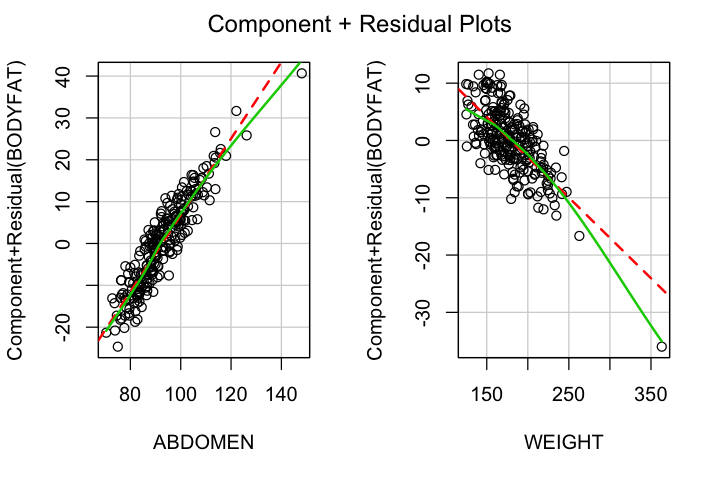

In [89]:
crPlots(m2)

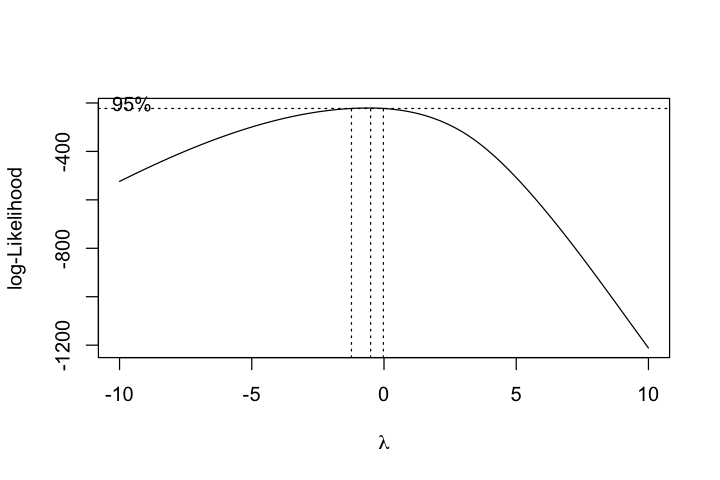

In [90]:
bc <- boxcox(WEIGHT~1, data = data, lambda = seq(-10, 10, length = 10))
trans <- bc$x[which.max(bc$y)]
W2 <- WEIGHT^trans
mt<- lm(BODYFAT ~ ABDOMEN + WEIGHT + W2)

We did variable transformation and result as following:
$$BodyFat\ \% = 38.537 - 0.278Weight - 729.556Weight^{-0.505} + 0.905Abdomen$$

Linearity test:

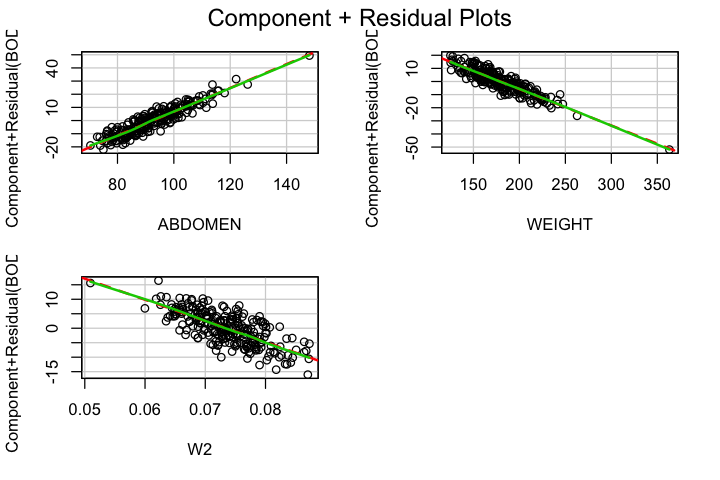

In [91]:
crPlots(mt)

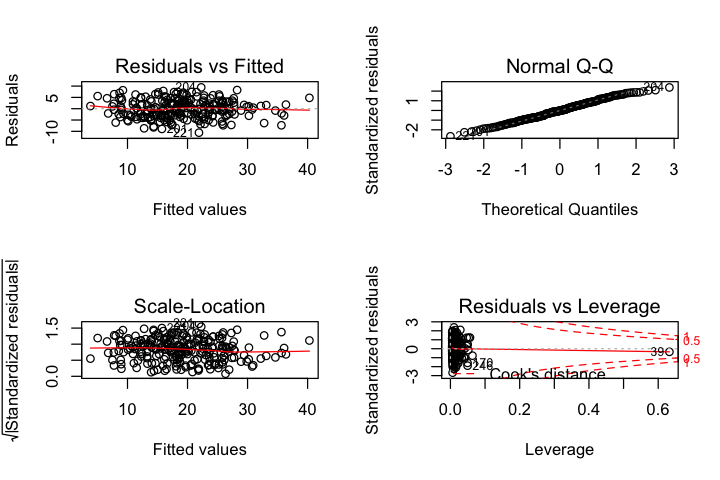

In [92]:
par(mfrow = c(2,2))
plot(mt)
par(mfrow = c(1,1))

### Four-variables Models

This model passed all of the normality test, multi-collinearity test and homoscedasticity test.

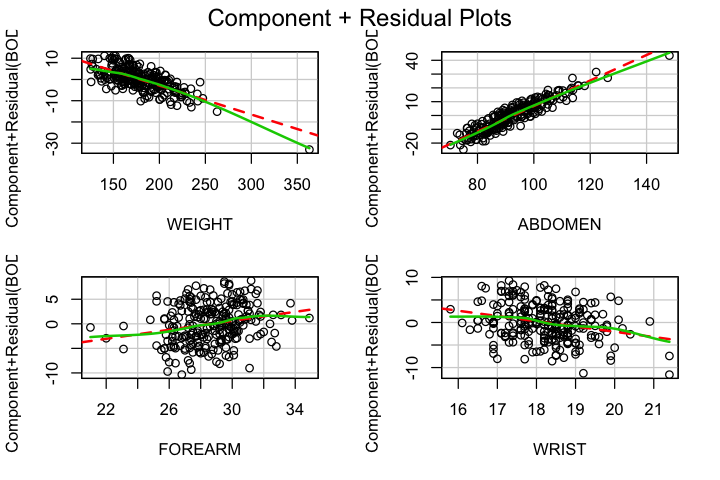

In [93]:
crPlots(m5) 

In [94]:
mt_2 = lm(BODYFAT~WEIGHT+W2+ABDOMEN+FOREARM+WRIST, data)

Linearity Test

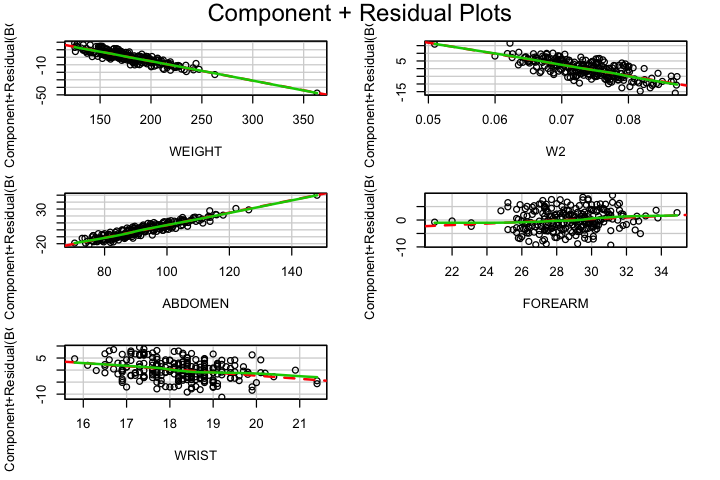

In [95]:
crPlots(mt_2)

Normality Test

In [96]:
shapiro.test(mt_2$residuals)


	Shapiro-Wilk normality test

data:  mt_2$residuals
W = 0.9922, p-value = 0.2145


Multi-collinearity Test

In [97]:
vif(mt_2)

WEIGHT        W2   ABDOMEN   FOREARM     WRIST 
26.802156 26.974932  4.915920  1.981809  2.341745

| Variable            | VIF              |
| :-------------------| :------------- : | 
| $$ WEIGHT $$        | 26.80            |
| $$WEIGHT^{-0.505} $$| 26.95            |
| $$ ABDOMEN $$       | 4.92             | 
| $$FOREARM $$        | 1.98             | 
| $$WRIST  $$         | 2.34             |


Homoscedasticity Test

In [98]:
ncvTest(mt_2) 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.5363876    Df = 1     p = 0.4639337 

## Proposed SLR Model 

$$BodyFat\ \% = 50.183 - 0.2571Weight - 720.904Weight^{-0.505} + 0.904Abdomen + 0.279Forearm - 1.308Wrist$$

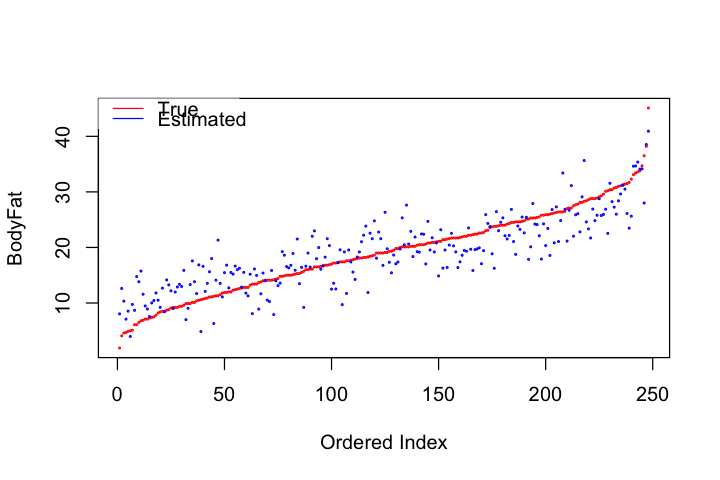

In [99]:
new <- data.frame(BODYFAT = BODYFAT, final = mt_2$fitted.value)
orders = order(new$BODYFAT)
plot(x = 1:248, y = new$BODYFAT[orders], col = "red", cex = 0.2, xlab = "Ordered Index", ylab = "BodyFat")
points(new$final[orders], col = "blue", cex = 0.2)
legend("topleft", legend = c("True", "Estimated"), col = c("red", "blue"), 
       lty = c(1,1), box.col = "white")

## Rule of Thumb

**Possible rule of thumb**
- "multiply your forearm circumference (cm) by 0.5, add the difference of your abdomen circumference (cm) and wrist circumference (cm), minus one length of your weight (lb) and minus 50"
- "multiply your weight (lb) by 0.2, add your abdomen (cm) and minus 40"

** Example Usage: **

For a 170lbs man with abdomen circumference about 90 cm, forearm circumference about 28 cm and wrist circumference about 17 cm, his predicted body fat % percentage would be around 19.55%. There is a 95% probability that his body fat is between 18.54% and 20.55%.
<br>
With the first rule of thumb, you get about 16% as the predicted body fat %.
<br>
With the second rule of thumb, you get about 20% as the predicted body fat %.

### Strengths and Weaknesses of the Analysis

The model is a reasonable model between body fat % and abdomen, weight.

Moreover, the model has the following strengths and advantages:

Linearity: seems reasonable. According the Component & Partial Residual plot and model residule v.s. fitted value plot.
Explanatory variables: reasonable since it's easy to think one’s body fat with his weight and abdomen. Because intuitively, if a man has a big abdomen, he tends to be fatter. Meanwhile, if his weight is heavier given other body measurements fixed, he is likely to be more muscled, since fat has less density. Besides, the variable forearm and wrist can be treated as a measurement of body frame size which will also contribute to body fat's calculation
Constant effects: reasonable because it is not affected by age or non-body factors.
Normally distributed errors: seems reasonable from the Q-Q plot diagnostic and also the model passed Shapiro-Wilk’s test.
Constant variance: the model passed the score test for non-constant error variance
Overall, our model provides a relatively simple way of predict the body fat % purely based on weight, forearm, wrist and abdomen.

Last but not least, there still exists some potential weaknesses or questions.

Should there be non-linear relationships? We only fit linear models and the true relations could be more complicated.
How to solve the multicollinearity between circumferences and other variables?
Could the conclusion also be used for women? The data was only collected for men, and therefore the model is only suitable for men. Does there exist a general formula for both men and women?